# 🧠 Intro to A.I., Machine & Deep learning in the sciences
### Kari K. Barry : Software Engineer 
#### Data Science and Systems Integration @ National Synchrotron Light Source II

## 💪 How to prepare your data for effective training and instancing

"*The quality of your model and its outputs are only as good as the data you put in it*"
- Ancient proverb

### Uniformity
1. Data (ideally) must be of the same shape, meaning the number of rows/columns are roughly the same
2. Data must be labeled consistently 


### The following is a good example of how to label your measurements

<center><img src="images/good_encoding.png" alt="Good encoding" width="900"/></center>
</br>
Notice how the same intensities are measured in both spreadsheets? Also the names of the measurements columns are the same unit.


### Conversely, this is a bad example
<center><img src="images/bad_encoding.png" alt="Bad encoding" width="500"/></center>



## Encodings
Computers intrinsically understand NUMBERS, whereas we are working with complex measurements that carry nuance. We have to *encode* that nuance into the numbers using principals like *cardinality* and *dimensionality*.



- One Hot Encoding: Convert values to binary operators, 0 and 1 can be used to indicate if something *is* or *isn't* in a category. This works well with poorly labeled data but can create tables that have too many bespoke features. Generally this should be avoided unless absolutely necessary.</br></br>
<center><img src="images/ohe.jpg" alt="One Hot Encoding" width="650"/></center>



- **Label Encoding** : (This is what we will be doing) Create features based off a constrained list of properties and assign those properties numbers. The numbers (e.g. 1, 2, 3) have meanings that map back to labels.</br>
<center><img src="images/le.png" alt="Label Encoding" width="550"/></center>


## ❓️ What is Machine Learning? How is it different from Deep Learning & A.I.
Machine leaning, like an advanced form of statistics, helps us make sense of our data.
Deep learning and A.I. are machine learning principals scaled up to deal with a *massive* volume of data, instituting additional controls like *weights* and *biases* to influence the outcome. 

However, we don't have access to that much data in this experiment. This is a good thing, we can use the *Scikit Learn* python library which can operate on the data within the registers of our CPU to form a comprehensive model. Deep learning often requires parallel computers like GPUs to process such large and complex volumes of data with libraries like NVIDIA *CUDA*.



Let's say we have a bunch of measurements of one class of thing or another, plotting our data out allows us to see the relationship of measurements we already have. However, what if there's a new datapoint and we need to figure out how it should be classified? Where it should go on the plot? Traditional approaches have this problem.</br></br>
<center><img src="images/instance_learn.png" alt="Instance based learning" width="550"/></center>




If we apply machine learning principals to cluster results together based on *features*, this allows us to build a model which can be represented on the plot with either a line or a subset. Now we can more accurately place new instances within the plot and make predictions about what class they will belong to.</br></br>
<center><img src="images/model_learn.png" alt="Model based learning" width="550"/></center>



### Models & algorithms
These work through *algorithms* which sort the data a specific way to form the model.
For the sake of simplicity, we're going to present two algorithms and use one of them.
- *K-nearest Neighbor* : When analyzing the plot, if instances with similar features are naturally **grouped together** in *clusters*, K-Nearest Neighbor can help further group new instances together and create distinct regions representing classifications.
- *Linear and logistic regression* : If instances appear to be divisible into classifications by a **straight line** on the plot, regressors are a good choice for mapping features. A linear or logistic series of values is descended to find and create classifications amongst similar instances.

There are of course, many other algorithms available for different use cases. Which of these two should we use for our data?

(The only way to find out will be to set up a python environment and generate a plot)

In [97]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [98]:
# Load the combined dataset
combined_df = pd.read_csv("data/combined.csv")

# Step 2: Prepare the Data
# Assume first column is wavelength, others are sample types (flour, corn starch, etc.)
wavelengths = combined_df.iloc[:, 0]
sample_data = combined_df.iloc[:, 1:]
sample_labels = sample_data.columns

In [99]:
# Transpose so each row is one sample, and columns are wavelengths
X = sample_data.T
X.columns = wavelengths
X.index.name = 'Sample'

# Create label vector from index
labels = X.index
X = X.reset_index(drop=True)

# Step 3: Normalize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Reduce Dimensions for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

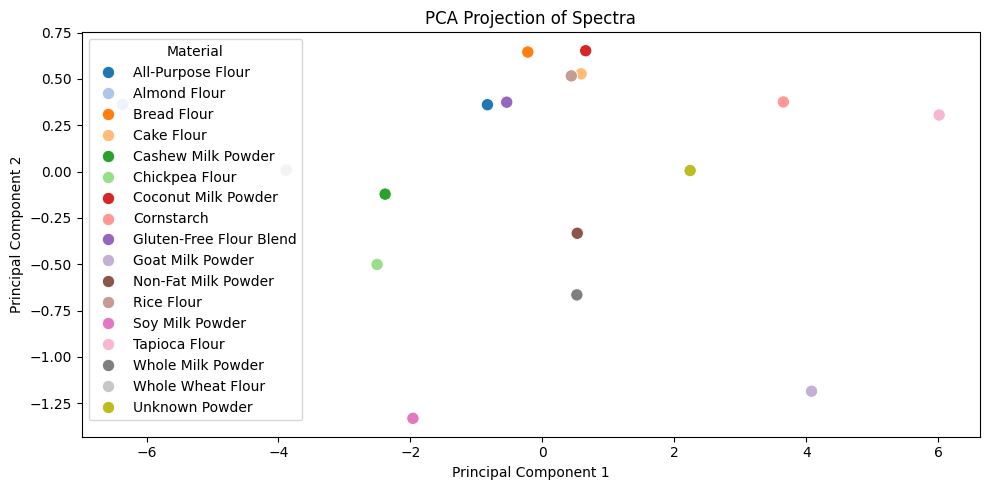

In [100]:
# Create a PCA projection which can show us a basic positioning of similar materials by spectra
plt.figure(figsize=(10, 5))

palette = sns.color_palette("tab20", n_colors=17)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette=palette, s=80, zorder=0)
plt.title("PCA Projection of Spectra")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Material", loc="best")
plt.tight_layout()
plt.show()

The generated plot normalizes the intensity values of our measurements and embeds them as features of each sample type. This allows us to plot them on a scale relative to each other. Upon closer inspection what sort of trend do you notice visually within the plot?

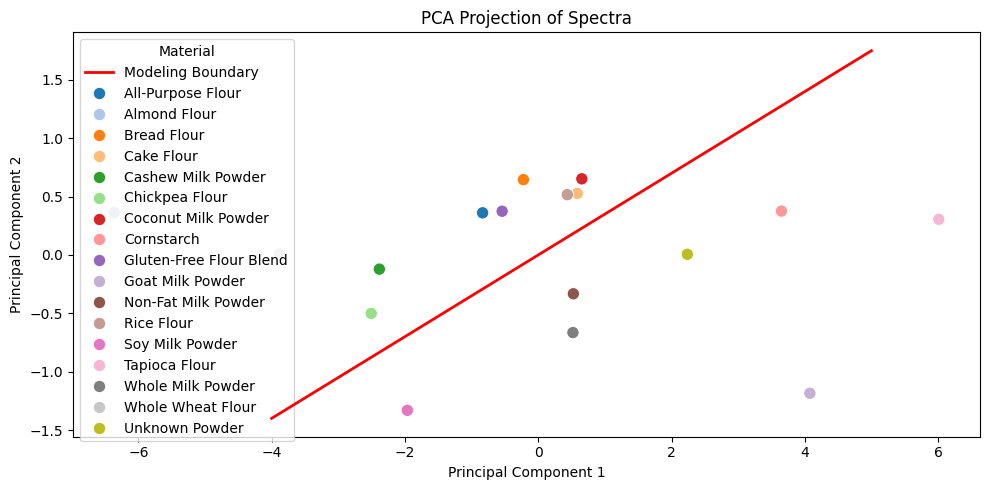

In [101]:
plt.figure(figsize=(10, 5))
# Draw a red shape to reveal what kind of modeling would be best fit
x_min, x_max = plt.xlim()
y_mean = X_pca[:, 1].mean()
slope = 0.35
x_vals = np.array([x_min + 5 , x_max - 5])
y_vals = y_mean + slope * (x_vals - x_min)
line, = plt.plot(x_vals, y_vals, 'r-', linewidth=2, label='Modeling Boundary', zorder=10)
palette = sns.color_palette("tab20", n_colors=17)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette=palette, s=80, zorder=0)
plt.title("PCA Projection of Spectra")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Material", loc="best")
plt.tight_layout()
plt.show()

### Training the logistic regression
We can use Scikit Learn's built in logistic regression to fit this data pretty effectively using the default parameters. Notice we have a lot of control over the model while training, including setting incentives for embedding, adding weights and choosing how many iterations (sometimes called *steps* or *epics*) we want the training to take.

In [102]:
# Step 5: Fit a Logistic Regression Model (linear classifier) which we can use to make predictions
model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, labels)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Evaluate the accuracy of your model and adjust training accordingly
Scikit-learn includes tools for checking a model's accuracy and the efficacy of training overall. It uses some of the sample data to test a handful of predictions behind the scenes and report back if they were correct or not.

In [112]:
# Evaluate on same data (for demo purposes)
pred_labels = model.predict(X_scaled)
accuracy = accuracy_score(labels, pred_labels)
print(f"Training Accuracy: {accuracy:.2f}")

Training Accuracy: 0.82


### Visualize your model's accuracy to identify overfitting and underfitting of data
We can use a tool known as a *confusion matrix* which will show us predictions made against the model during testing as 1's and 0's. A 1 means that is what the (generated test) sample was predicted to be and a 0 means the opposite. False positives and negatives can be seen here easily as a 1 where the sample being predicted is incorrect. Too many false positives or negatives can help us find examples of *underfitting* and *overfitting* in the training data.

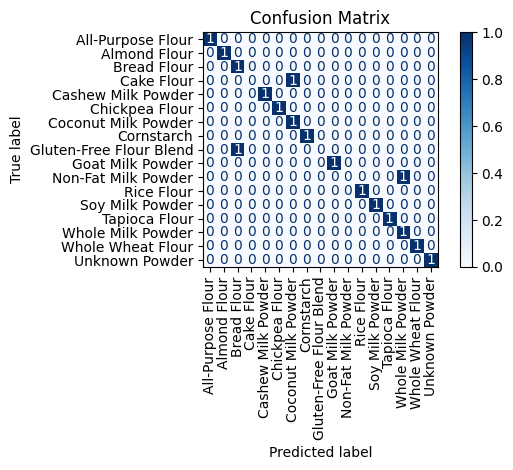

In [113]:

cm = confusion_matrix(labels, pred_labels, labels=labels.unique())
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels.unique()).plot(cmap="Blues", xticks_rotation=90)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

### Training data quantity and accuracy
Sometimes data can be noisy or contain points that are irrelevant to training a useful model. Other times insufficient quantities or instances data may be provided to make a correct prediction when an example is not in the training set. It can be easy for models to make assumptions, either over or under zealously. 

#### Overfitting
When the data contains too many irrelevant points it can skew it's overall perspective. This causes the predictions to be overly general.
<center><img src="images/overfitting.png" alt="An example of overfitting" width="550"/></center>

#### Underfitting
Conversely, When the training data does not contain enough examples of a correct category (imagine training a neural network on dogs but you leave out any pictures of *chihuahuas*, it may incorrectly label them as something else) underfitting can occur.
<center><img src="images/underfitting.png" alt="An example of underfitting" width="550"/></center>

### 💡 Possible solutions to training problems
- Use more instances of high quality data
- Withhold some data from training and use that data to verify the model is accurate later.
<center><img src="images/solutions.png" alt="Preventing over and underfitting" width="500"/></center>

### 🧪 Let's use our model to predict what kind of powder an unmarked sample is

In [104]:
# Step 6: Load Mystery Sample and Predict
mystery_df = pd.read_csv("data/MysteryPowder.csv")

# Make sure the sample is in the same format (just the intensity values)
mystery_sample = mystery_df.iloc[:, 1].values.reshape(1, -1)  # skip the wavelength column
mystery_scaled = scaler.transform(mystery_sample)


In [105]:
mystery_pred = model.predict(mystery_scaled)

print(f"\n🔍 The mystery sample is predicted to be: {mystery_pred[0]}")


🔍 The mystery sample is predicted to be: Tapioca Flour


### 🗜️ Now we can compare the accuracy of student made instruments
Adding code to parse a folder of student recorded samples as .csv files, we can use our model to identify each sample and determine if a student made detector is accurate to the instances our model was trained on.

In [106]:
# 🎓 Step 8: Analyze Student Samples
# Assume all student files are in the same directory and follow the format 'StudentName-Material.csv'
student_files = glob.glob("data/students/*.csv")
student_data = []
student_metadata = []

for file in student_files:
    filename = os.path.basename(file)
    
    try:
        name, material = filename.replace(".csv", "").replace("_", " ").split("-", 1)
        df = pd.read_csv(file)
        sample_values = df.iloc[:, 1].values  # assume second column is values
        student_data.append(sample_values)
        student_metadata.append({"Student": name, "Material": material})
    except Exception as e:
        print(f"Could not read {filename}: {e}")

In [107]:
student_df = pd.DataFrame(student_data)
student_meta_df = pd.DataFrame(student_metadata)

# Normalize and reduce dimensions
student_scaled = scaler.transform(student_df)
student_pca = pca.transform(student_scaled)


In [108]:
# Predict with trained model
student_predictions = model.predict(student_scaled)
student_meta_df["Predicted"] = student_predictions

In [109]:
# Show prediction and error comparison
student_meta_df["Correct"] = student_meta_df["Material"] == student_meta_df["Predicted"]
print("\nStudent Sample Predictions:")
print(student_meta_df)


Student Sample Predictions:
  Student     Material     Predicted  Correct
0     Jax  Bread Flour  Almond Flour    False
1    Luna  Bread Flour  Almond Flour    False
2     Rin   Cornstarch    Rice Flour    False
3     Rin  Bread Flour  Almond Flour    False
4   Fleki   Cornstarch    Cornstarch     True
5    Luna   Cornstarch    Rice Flour    False
6     Jax   Cornstarch    Rice Flour    False
7   Fleki  Bread Flour   Bread Flour     True


### 👀 Finally, visualize these results with another plot
This will let us see visually where student samples landed relative to the training data

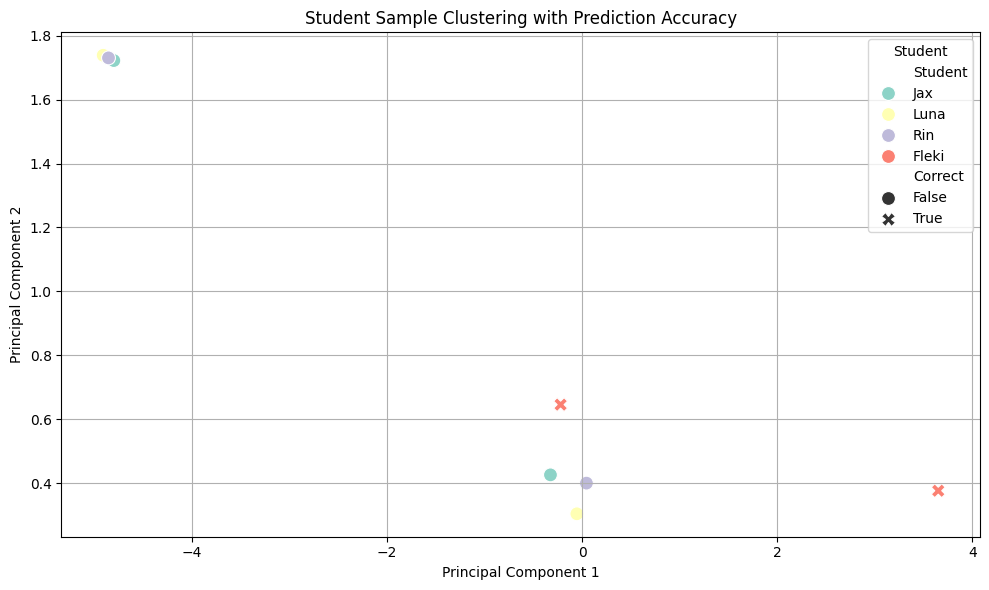

In [ ]:
# Visualize clustering by student and prediction
plt.figure(figsize=(10, 6))
sns.scatterplot(x=student_pca[:, 0], y=student_pca[:, 1], hue=student_meta_df["Student"], style=student_meta_df["Correct"], palette="Set3", s=100)
plt.title("Student Sample Clustering with Prediction Accuracy")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Student")
plt.grid(True)
plt.tight_layout()
plt.show()

### In conclusion
Machine learning can enable us to make new and novel discoveries about our data and about the world overall. It is not all powerful or all knowing, LLMs aren't god. They're just applications of matrix multiplication at extreme scales. Empower yourself to be an advanced user of A.I. and Deep Learning tools by learning what happens under the hood, this will give you a competitive advantage over your peers and enable you to make the most of tomorrow's technology.

#### Further Reading:
- *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition* by *Aurélien Géron* 
    - ISBN-13: 978-1492032649